In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree
import numpy as np
from sklearn.metrics import recall_score, precision_score

%matplotlib inline

In [ ]:
df_train = pd.read_csv("/content/train.csv")

## Рассмотрим датасет по ближе

In [ ]:
df_train.shape

(128727, 6)

In [ ]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128727 entries, 0 to 128726
Data columns (total 6 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   id           128727 non-null  int64  
 1   Easting      128726 non-null  float64
 2   Northing     128726 non-null  float64
 3   Height       128726 non-null  float64
 4   Reflectance  128726 non-null  float64
 5   Class        128726 non-null  float64
dtypes: float64(5), int64(1)
memory usage: 5.9 MB


Пострим на распределение данных

Text(0.5, 1.0, 'Распределение класса точки')

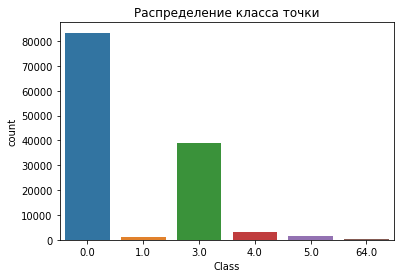

In [ ]:
sns.countplot(x = "Class" , data  = df_train).set_title('Распределение класса точки')

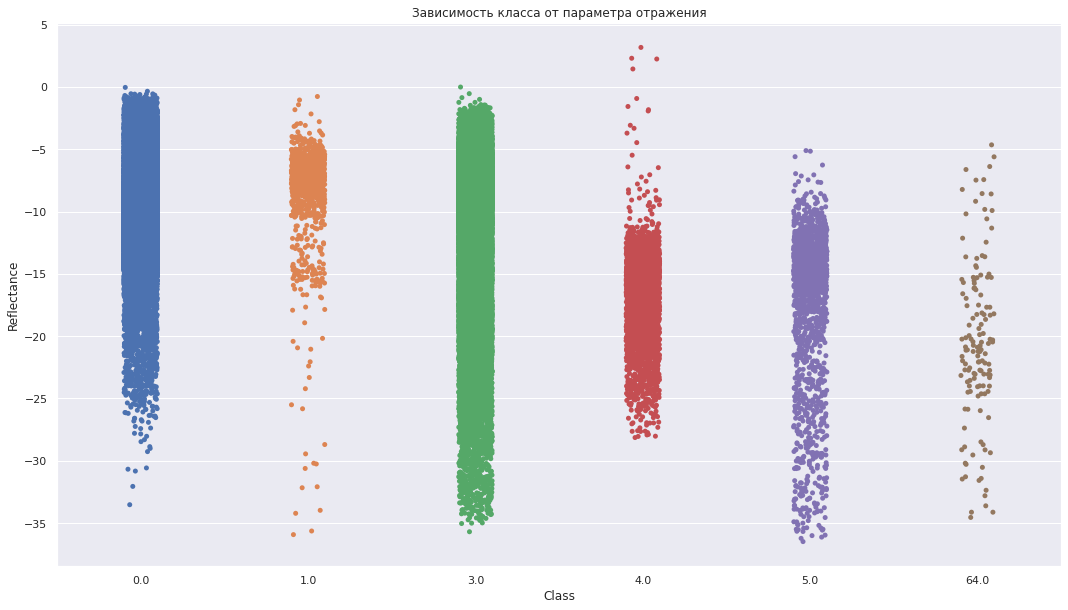

In [ ]:
sns.set(rc={'figure.figsize':(18,10)})
sns.stripplot(data = df_train, x= "Class", y = "Reflectance").set_title('Зависимость класса от параметра отражения');

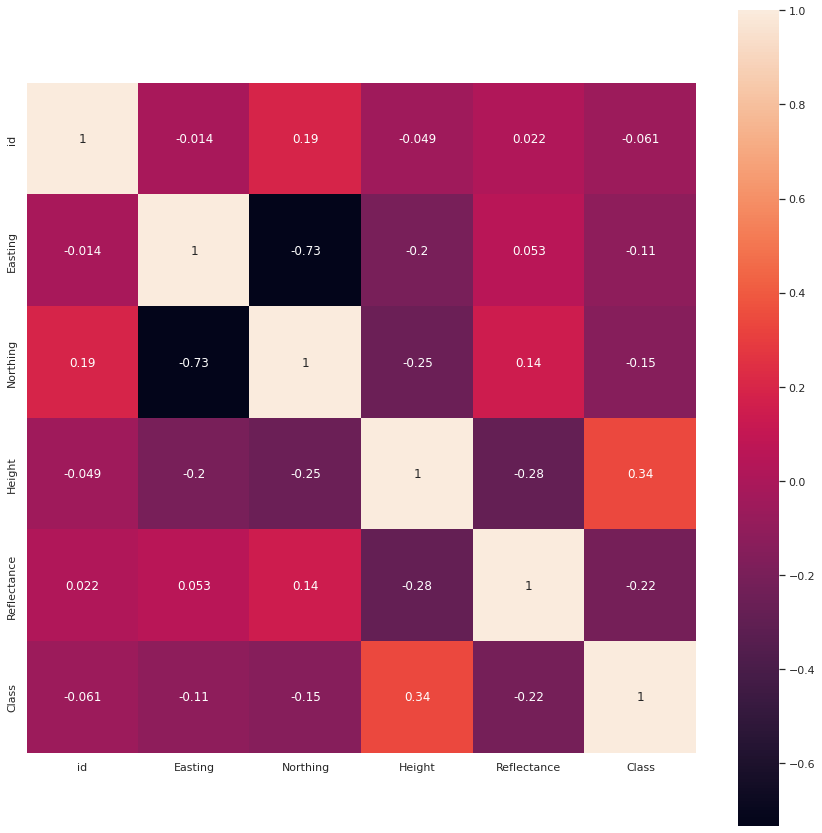

In [ ]:
plt.rcParams['figure.figsize']=(15,15)

g = sns.heatmap(df_train.corr(), square = True, annot=True)

## Выделим выборки

In [ ]:
df_train = df_train.fillna(0)

In [ ]:
X = df_train.drop(["Class", "id"], axis = 1)
y = df_train[["Class"]]

In [ ]:
X.shape

(128727, 4)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
y_train

,Class
78327,3.0
46613,0.0
27979,0.0
20877,0.0
10700,0.0
...,...
128106,3.0
103694,3.0
860,3.0
15795,3.0


## Обучение модели

In [ ]:
clf = RandomForestClassifier(random_state=0)

In [ ]:
clf.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """Entry point for launching an IPython kernel.


RandomForestClassifier(random_state=0)

## Оценка точности

In [ ]:
pred = clf.predict(X_test)

In [ ]:
y_test.head(3)

,Class
57494,0.0
52475,0.0
43373,1.0


In [ ]:
result = recall_score(y_test, pred, average='macro', zero_division=True)

print("Recall score",result)

Recall score 0.05414201720810461
